In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_metrics = pd.read_csv("metrics.csv", index_col=0)
df_metrics

,MSE,RMSE,R^2,Adj R^2,EVs,AIC
Linear Regression,119.908203,10.950260,0.818644,0.803146,0.818644,5280.223871
GWR,128.109551,11.318549,0.806239,0.789682,0.808532,1529.338979
MESF-Queen,115.646884,10.753924,0.825089,0.808191,0.825089,5261.578263
MESF-KNN,118.783898,10.898803,0.820344,0.802988,0.820344,5290.162654
MESF-Gabriel,113.669868,10.661607,0.828079,0.811470,0.828079,5243.162637
SVR,0.914437,0.956262,0.998617,0.998499,0.998676,72.470973
GWSVR,158.500936,12.589715,0.760273,0.739788,0.762626,5578.232215


In [3]:
df_metrics_red = pd.read_csv("metrics_red.csv", index_col=0)
df_metrics_red

,MSE,RMSE,R^2,Adj R^2,EVs,AIC
Linear Regression,160.004466,12.649287,0.757999,0.753377,0.762458,5460.315447
GWR,92.873596,9.637095,0.859532,0.858738,0.862931,1481.899846
MESF-Queen,151.352675,12.302548,0.771085,0.748970,0.771085,5548.946376
MESF-KNN,158.067926,12.572507,0.760928,0.737832,0.760928,5595.310542
MESF-Gabriel,146.097583,12.087083,0.779033,0.757686,0.779033,5511.205463
SVR,37.509157,6.124472,0.943269,0.938421,0.944206,4039.056882


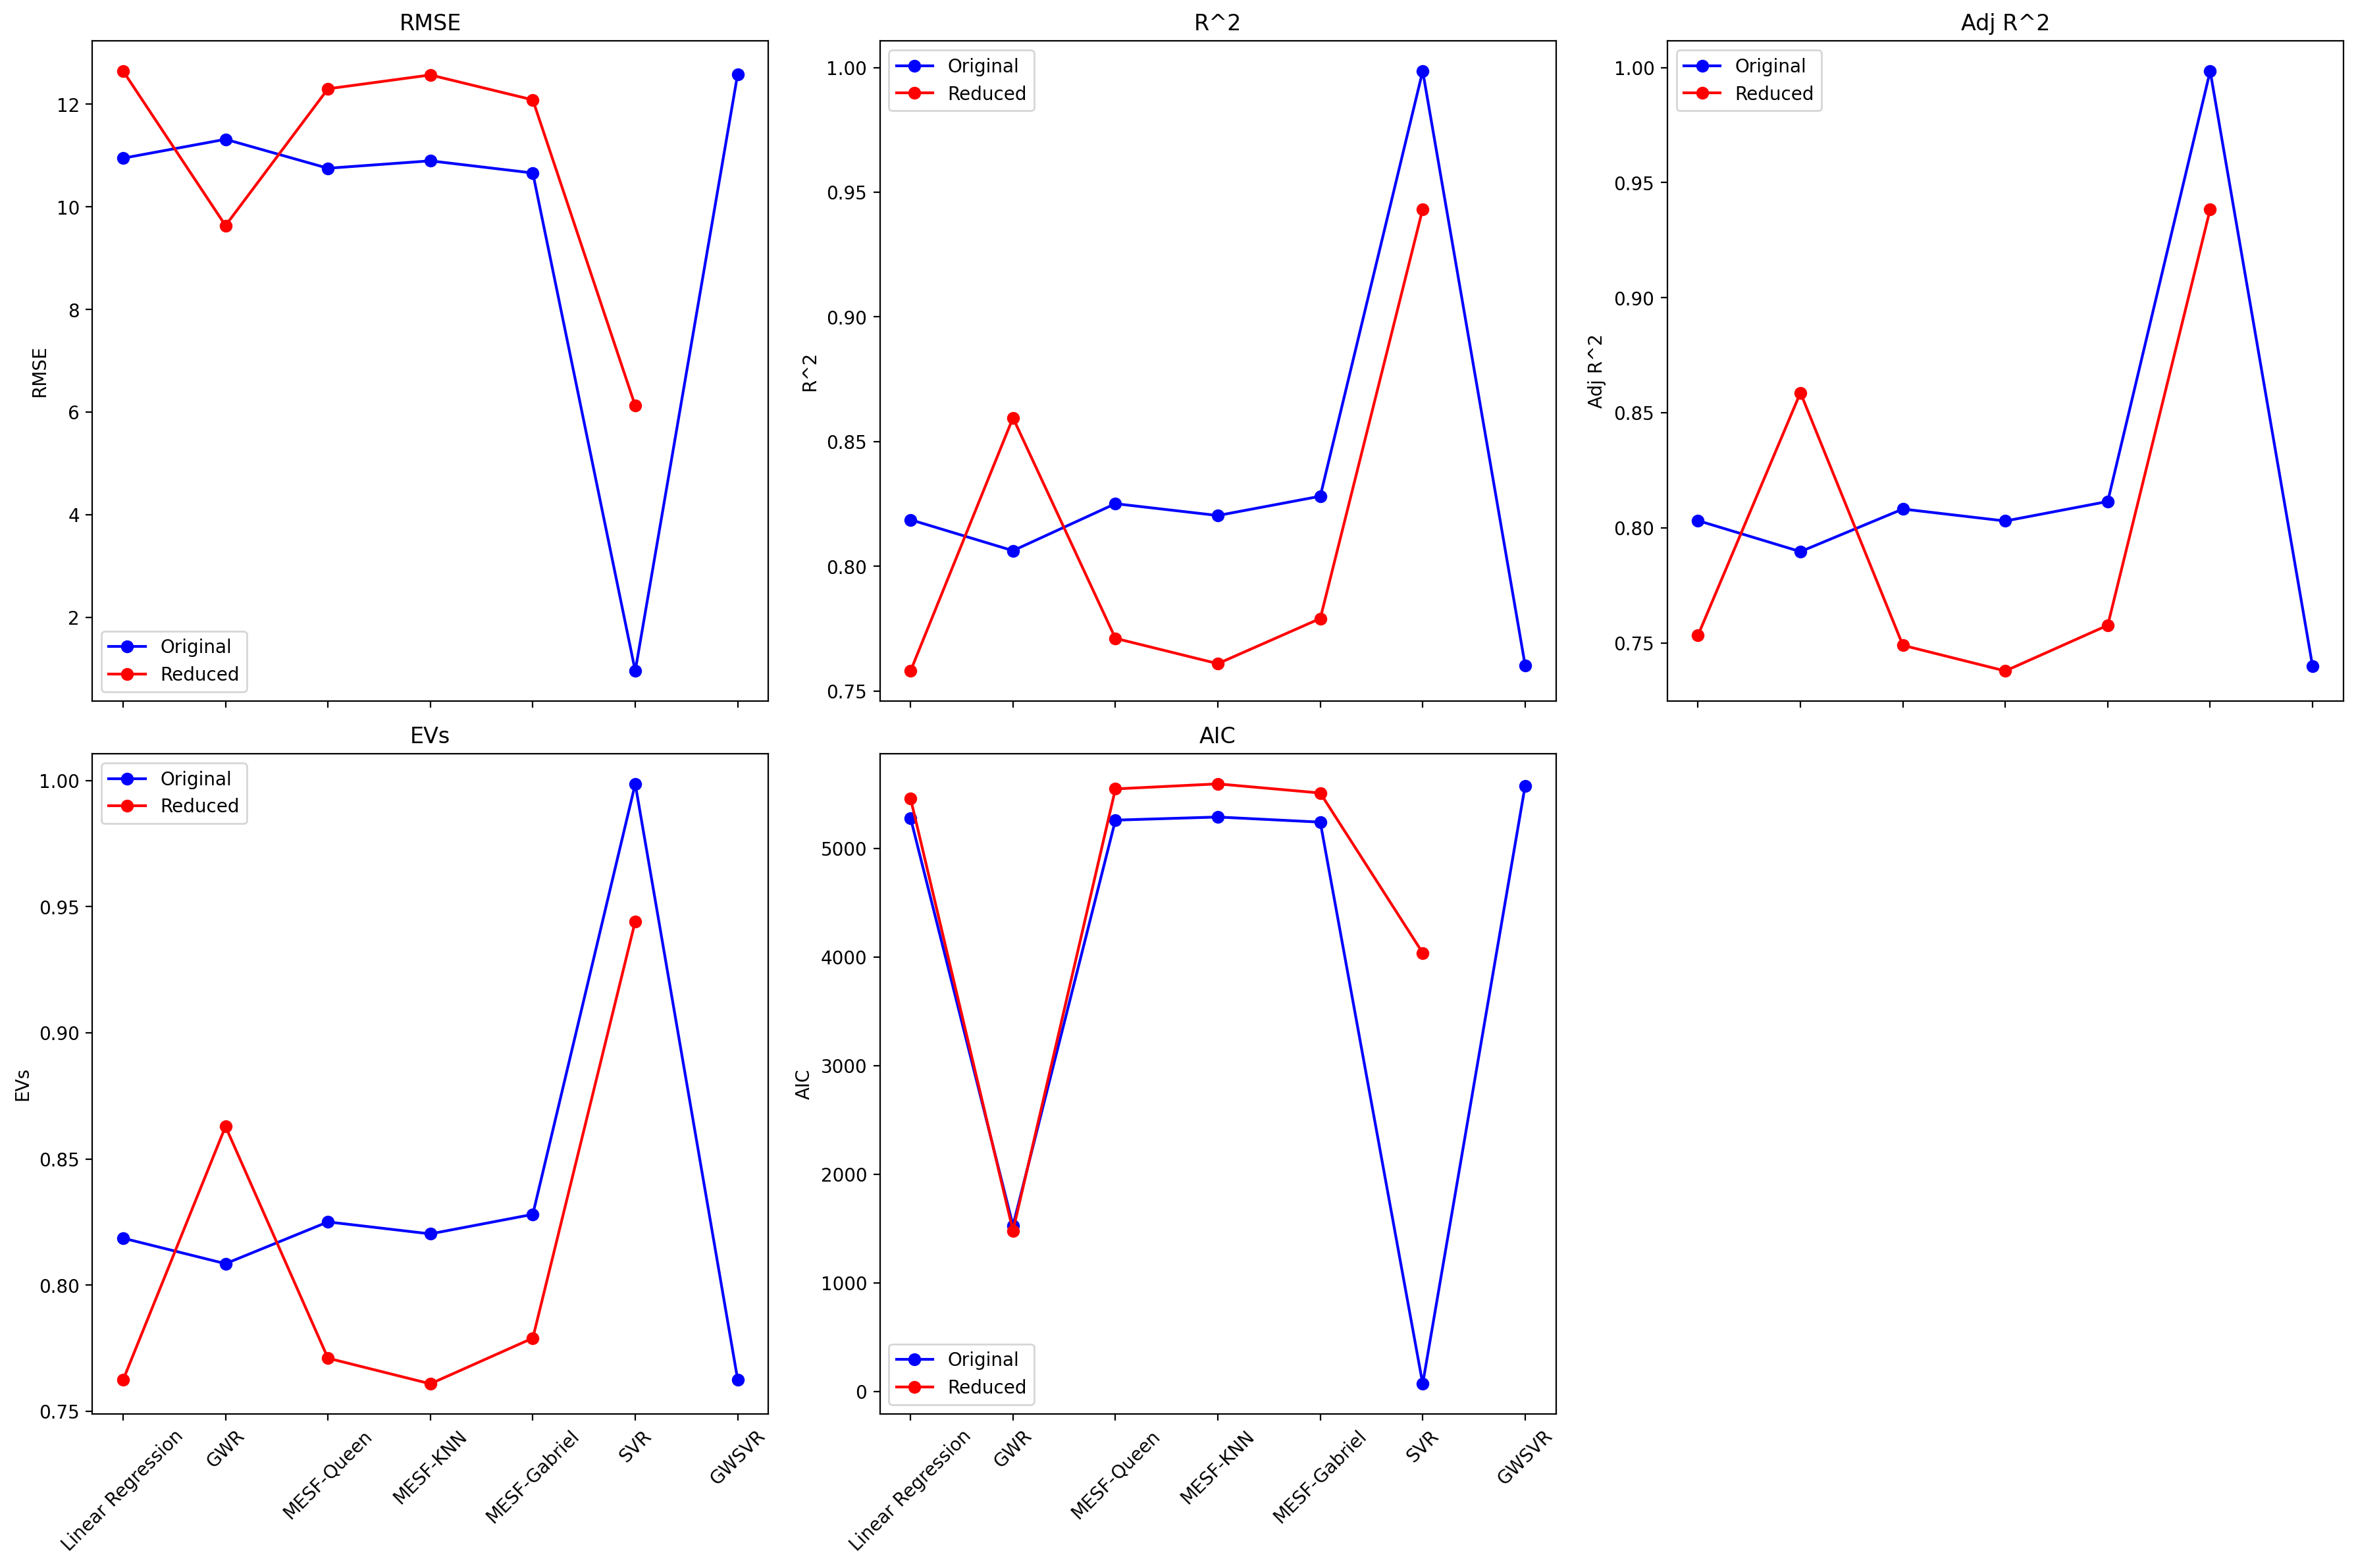

In [22]:
metrics = ['RMSE', 'R^2', 'Adj R^2', 'EVs', 'AIC']

fig, axs = plt.subplots(2, 3, figsize=(18, 12), sharex=True)
colors = {'df_metrics': 'blue', 'df_metrics_red': 'red'}

axs = axs.flatten()
for i, metric in enumerate(metrics):
    axs[i].plot(df_metrics.index, df_metrics[metric], marker='o', color=colors['df_metrics'], label='Original')
    axs[i].plot(df_metrics_red.index, df_metrics_red[metric], marker='o', color=colors['df_metrics_red'], label='Reduced')
    
    axs[i].set_title(metric)
    axs[i].set_ylabel(metric)
    axs[i].legend()

    axs[i].set_xticks(range(len(df_metrics.index)))
    axs[i].set_xticklabels(df_metrics.index, rotation=45)

fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

In [25]:
df_metrics_autocorr = pd.read_csv("metrics_autocorr.csv", index_col=0)
df_metrics_autocorr

,Moran's I,Mean MSE
Linear Regression,0.133607,181.599291
GWR,0.091858,192.927322
MESF-Queen,0.111243,283.972372
MESF-KNN,0.099513,233.907563
MESF-Gabriel,0.040453,234.958120
SVR,0.098604,280.698096
GWSVR,0.284683,NaN


In [26]:
df_metrics_autocorr_red = pd.read_csv("metrics_autocorr_red.csv", index_col=0)
df_metrics_autocorr_red

,Moran's I,Mean MSE
Linear Regression,0.214738,178.444837
GWR,0.101605,120.867957
MESF-Queen,0.223998,251.946234
MESF-KNN,0.204845,219.689024
MESF-Gabriel,0.142250,267.803233
SVR,0.122126,295.315257


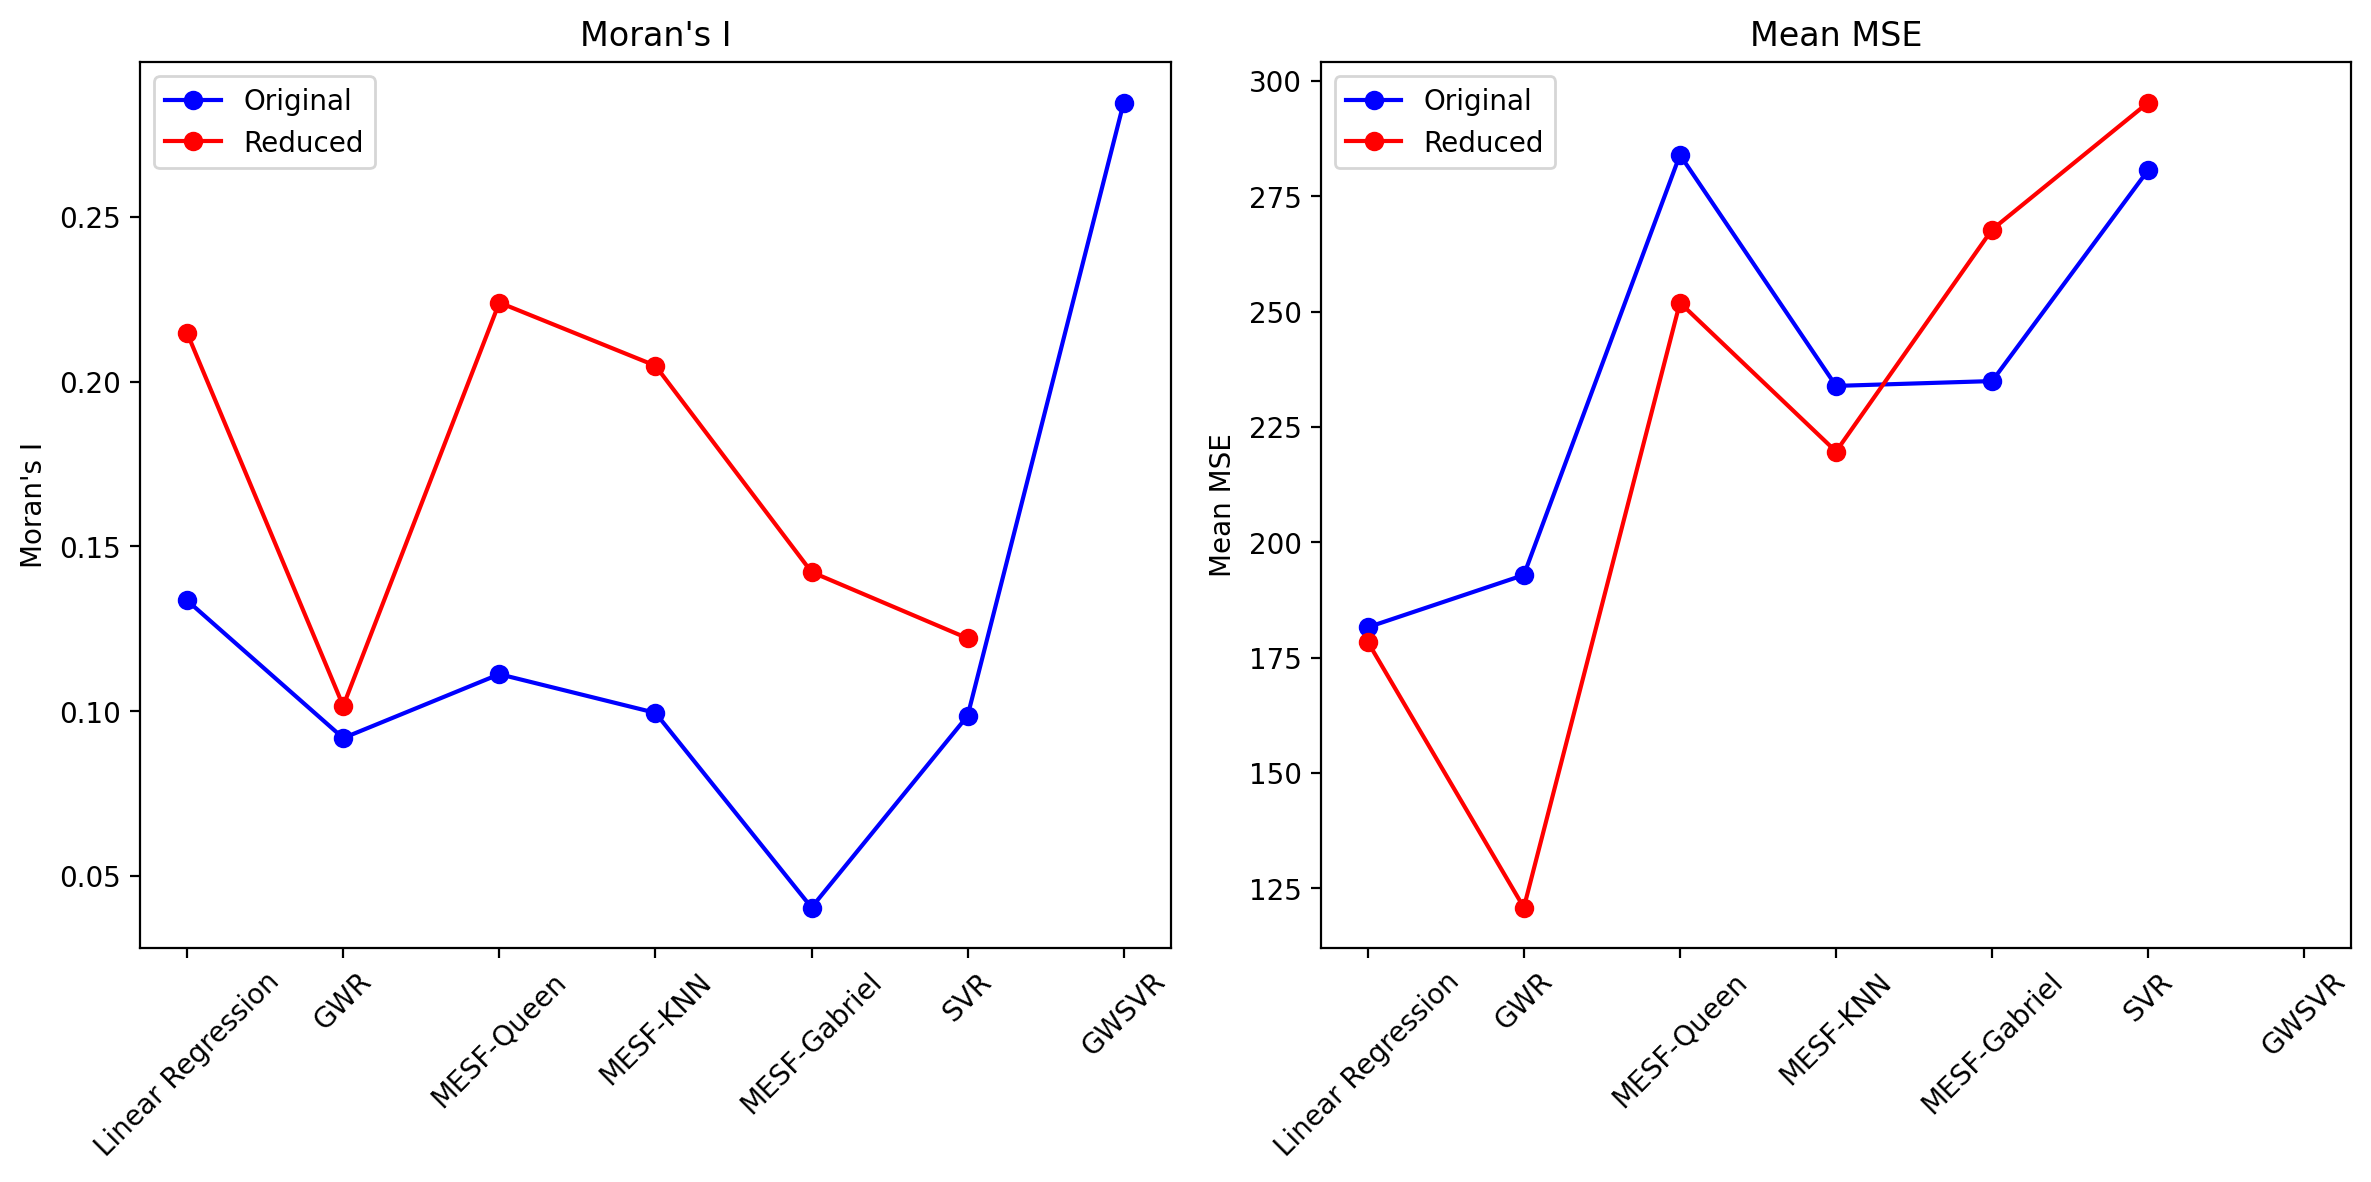

In [27]:
metrics = ["Moran's I",	"Mean MSE"]

fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
colors = {'df_metrics_autocorr': 'blue', 'df_metrics_autocorr_red': 'red'}

axs = axs.flatten()
for i, metric in enumerate(metrics):
    axs[i].plot(df_metrics_autocorr.index, df_metrics_autocorr[metric], marker='o', color=colors['df_metrics_autocorr'], label='Original')
    axs[i].plot(df_metrics_autocorr_red.index, df_metrics_autocorr_red[metric], marker='o', color=colors['df_metrics_autocorr_red'], label='Reduced')
    
    axs[i].set_title(metric)
    axs[i].set_ylabel(metric)
    axs[i].legend()

    axs[i].set_xticks(range(len(df_metrics_autocorr.index)))
    axs[i].set_xticklabels(df_metrics_autocorr.index, rotation=45)

plt.tight_layout()
plt.show()

In [6]:
latex_table = df_metrics.to_latex(
    column_format="lcccccc",  # Adjust the column alignment
    caption="Performance Metrics for the different Models",
    label="table:models_metrics",
    index_names=True,  # Ensure the index name (Model) is included
    bold_rows=True  # Bold the index (model names)
)

# Adding some manual tweaks to highlight rows, etc.
# Example: manually adding a LaTeX command to bold specific cells
latex_table = latex_table.replace("\\textbf{GWR}", "\\textbf{GWR} \\boldmath")
latex_table = latex_table.replace("\\toprule", "\\toprule\nModel & R^2 & AIC & Adj R^2 & RMSE & EVs \\\\\n\\midrule")

print(latex_table)

\begin{table}
\caption{Performance Metrics for the different Models}
\label{table:models_metrics}
\begin{tabular}{lcccccc}
\toprule
Model & R^2 & AIC & Adj R^2 & RMSE & EVs \\
\midrule
 & Moran's I & Mean MSE \\
\midrule
\textbf{Linear Regression} & 0.133607 & 178.444837 \\
\textbf{GWR} \boldmath & 0.101605 & 120.867957 \\
\textbf{MESF-Queen} & 0.111243 & 251.946234 \\
\textbf{MESF-KNN} & 0.099513 & 219.689024 \\
\textbf{MESF-Gabriel} & 0.040453 & 267.803233 \\
\textbf{SVR} & 0.122126 & 295.315257 \\
\bottomrule
\end{tabular}
\end{table}



In [7]:
# DataFrame to a LaTeX table
latex_table = df_metrics.to_latex(
    caption="Performance Metrics for the different Models", label="table:models_metrics"
)
print(latex_table)

# with open("gwr_metrics_table.tex", "w") as file:
#     file.write(latex_table)

\begin{table}
\caption{Performance Metrics for the different Models}
\label{table:models_metrics}
\begin{tabular}{lrr}
\toprule
 & Moran's I & Mean MSE \\
\midrule
Linear Regression & 0.133607 & 178.444837 \\
GWR & 0.101605 & 120.867957 \\
MESF-Queen & 0.111243 & 251.946234 \\
MESF-KNN & 0.099513 & 219.689024 \\
MESF-Gabriel & 0.040453 & 267.803233 \\
SVR & 0.122126 & 295.315257 \\
\bottomrule
\end{tabular}
\end{table}

